## Bibliotecas

In [61]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as datetime 
import warnings

In [62]:
plt.style.use('seaborn-notebook')

In [63]:
warnings.simplefilter("ignore")

## Buscando dados

In [48]:
inicio = datetime.datetime(2020, 1, 1)
fim = datetime.datetime(2021, 4, 12)

dados = yf.download('^BVSP', start=inicio, end=fim)[['Close', 'Adj Close']]
dados.head()

[*********************100%***********************]  1 of 1 completed


,Close,Adj Close
Date,,
2020-01-02,118573.0,118573.0
2020-01-03,117707.0,117707.0
2020-01-06,116878.0,116878.0
2020-01-07,116662.0,116662.0
2020-01-08,116247.0,116247.0


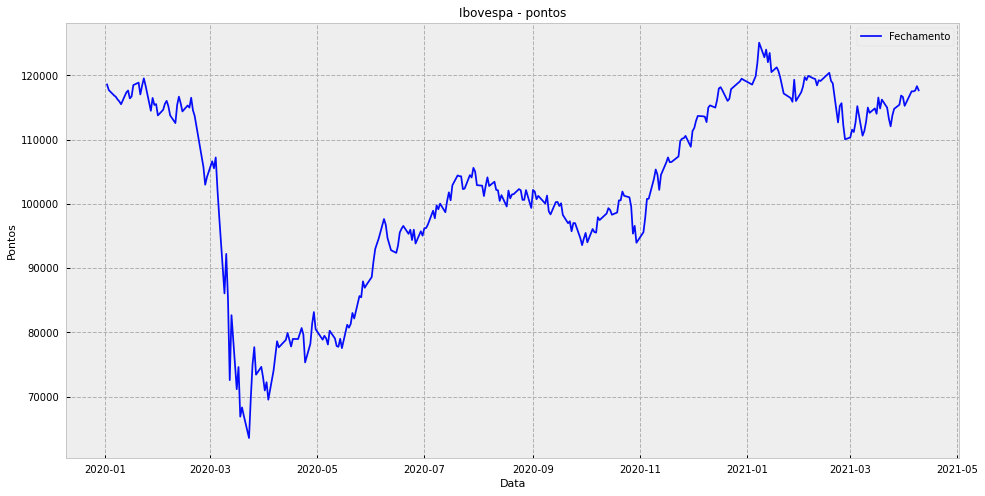

In [49]:
#Visualização:

plt.figure(figsize=(16, 8));
plt.plot(dados['Adj Close'], label='Fechamento', color='#050dfa');
plt.title('Ibovespa - pontos');
plt.xlabel('Data');
plt.ylabel('Pontos');
plt.legend();

## Definindo as bandas de Bollinger

In [64]:
periodo = 21
desvios = 1

dados['Desvio'] = dados['Adj Close'].rolling(periodo).std()
dados['MM'] = dados['Adj Close'].rolling(periodo).mean()
dados['Banda_sup'] = dados['MM'] + (dados['Desvio'] * desvios)
dados['Banda_inf'] = dados['MM'] - (dados['Desvio'] * desvios)

dados.dropna(axis=0, inplace=True)
dados.head()

,Close,Adj Close,Desvio,MM,Banda_sup,Banda_inf,Retorno,Alvo,Regra,Trade,Retorno_trade
Date,,,,,,,,,,,
2020-03-09,86067.0,86067.0,7785.878578,109392.666667,117178.545245,101606.788089,-0.192807,-0.173109,-1,0.173109,1.238434
2020-03-10,92214.0,92214.0,8511.044845,108298.571429,116809.616274,99787.526583,-0.126240,-0.190828,-1,0.190828,1.429262
2020-03-11,85171.0,85171.0,9784.574503,106936.714286,116721.288789,97152.139782,-0.205672,-0.214580,-1,0.214580,1.643842
2020-03-12,72583.0,72583.0,12221.008103,105032.571429,117253.579532,92811.563325,-0.290024,-0.058567,-1,0.058567,1.702409
2020-03-13,82678.0,82678.0,12901.565343,103475.761905,116377.327247,90574.196562,-0.156321,-0.188793,-1,0.188793,1.891202


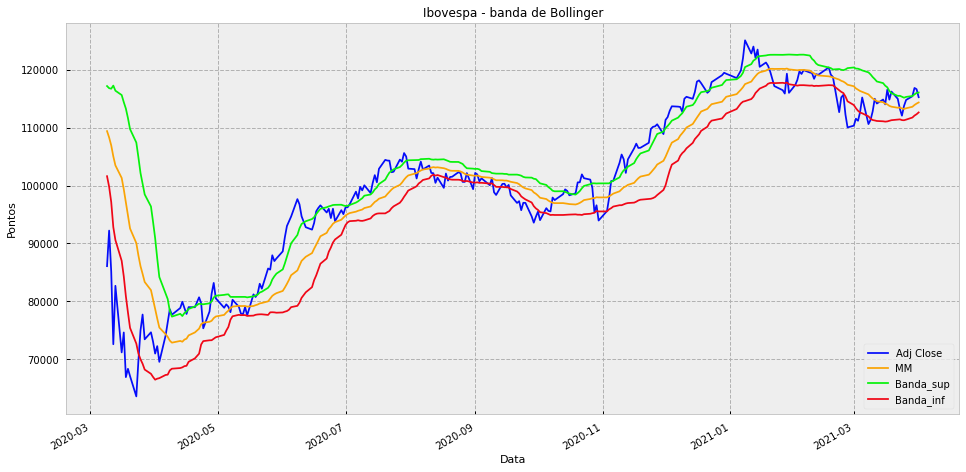

In [65]:
#Visualização

dados[['Adj Close', 'MM', 'Banda_sup', 'Banda_inf']].plot(figsize=(16, 8), 
                                                                   color=['#050dfa', '#faa405', '#07f20b', '#f00717'])
plt.xlabel('Data');
plt.ylabel('Pontos');
plt.title('Ibovespa - banda de Bollinger');
plt.legend();

## Criando alvo

In [66]:
periodos = 5 #dias para estar posicionado

dados['Retorno'] = dados['Adj Close'].pct_change(periodos)
dados['Alvo'] = dados['Retorno'].shift(-periodos)

dados.dropna(inplace=True)

In [67]:
dados.head()

,Close,Adj Close,Desvio,MM,Banda_sup,Banda_inf,Retorno,Alvo,Regra,Trade,Retorno_trade
Date,,,,,,,,,,,
2020-03-16,71168.0,71168.0,14317.814814,101308.809524,115626.624338,86990.994709,-0.173109,-0.106761,-1,0.106761,1.997964
2020-03-17,74617.0,74617.0,15043.622586,99354.285714,114397.908300,84310.663128,-0.190828,-0.065508,-1,0.065508,2.063471
2020-03-18,66895.0,66895.0,16196.662534,97093.047619,113289.710153,80896.385085,-0.214580,0.120502,-1,-0.120502,1.942969
2020-03-19,68332.0,68332.0,16788.280041,94856.047619,111644.327660,78067.767578,-0.058567,0.137242,-1,-0.137242,1.805727
2020-03-20,67069.0,67069.0,17168.139253,92574.714286,109742.853539,75406.575033,-0.188793,0.094828,-1,-0.094828,1.710900


In [68]:
dados.tail()

,Close,Adj Close,Desvio,MM,Banda_sup,Banda_inf,Retorno,Alvo,Regra,Trade,Retorno_trade
Date,,,,,,,,,,,
2021-03-19,116222.0,116222.0,2331.983874,113613.904762,115945.888636,111281.920888,0.018062,-0.012399,1,-0.012399,2.432997
2021-03-22,114979.0,114979.0,2044.395768,113434.428571,115478.824340,111390.032803,0.001114,0.003827,0,0.000000,2.432997
2021-03-23,113262.0,113262.0,2037.358563,113462.714286,115500.072849,111425.355723,-0.006639,0.031679,0,0.000000,2.432997
2021-03-24,112064.0,112064.0,2017.224427,113312.095238,115329.319665,111294.870811,-0.038482,0.040780,0,0.000000,2.432997
2021-03-25,113750.0,113750.0,1947.436569,113220.761905,115168.198474,111273.325336,-0.009448,0.013213,0,0.000000,2.432997


## Criando a estratégia

In [69]:
dados['Regra'] = np.where(dados['Adj Close'] > dados['Banda_sup'], 1, 0)
dados['Regra'] = np.where(dados['Adj Close'] < dados['Banda_inf'], -1, dados['Regra'])

In [70]:
dados['Trade'] = dados['Regra'] * dados['Alvo']
dados.head()

,Close,Adj Close,Desvio,MM,Banda_sup,Banda_inf,Retorno,Alvo,Regra,Trade,Retorno_trade
Date,,,,,,,,,,,
2020-03-16,71168.0,71168.0,14317.814814,101308.809524,115626.624338,86990.994709,-0.173109,-0.106761,-1,0.106761,1.997964
2020-03-17,74617.0,74617.0,15043.622586,99354.285714,114397.908300,84310.663128,-0.190828,-0.065508,-1,0.065508,2.063471
2020-03-18,66895.0,66895.0,16196.662534,97093.047619,113289.710153,80896.385085,-0.214580,0.120502,-1,-0.120502,1.942969
2020-03-19,68332.0,68332.0,16788.280041,94856.047619,111644.327660,78067.767578,-0.058567,0.137242,-1,-0.137242,1.805727
2020-03-20,67069.0,67069.0,17168.139253,92574.714286,109742.853539,75406.575033,-0.188793,0.094828,-1,-0.094828,1.710900


In [71]:
#Caculando juros simples

dados['Retorno_trade'] = dados['Trade'].cumsum()

In [72]:
dados.head()

,Close,Adj Close,Desvio,MM,Banda_sup,Banda_inf,Retorno,Alvo,Regra,Trade,Retorno_trade
Date,,,,,,,,,,,
2020-03-16,71168.0,71168.0,14317.814814,101308.809524,115626.624338,86990.994709,-0.173109,-0.106761,-1,0.106761,0.106761
2020-03-17,74617.0,74617.0,15043.622586,99354.285714,114397.908300,84310.663128,-0.190828,-0.065508,-1,0.065508,0.172269
2020-03-18,66895.0,66895.0,16196.662534,97093.047619,113289.710153,80896.385085,-0.214580,0.120502,-1,-0.120502,0.051767
2020-03-19,68332.0,68332.0,16788.280041,94856.047619,111644.327660,78067.767578,-0.058567,0.137242,-1,-0.137242,-0.085475
2020-03-20,67069.0,67069.0,17168.139253,92574.714286,109742.853539,75406.575033,-0.188793,0.094828,-1,-0.094828,-0.180302


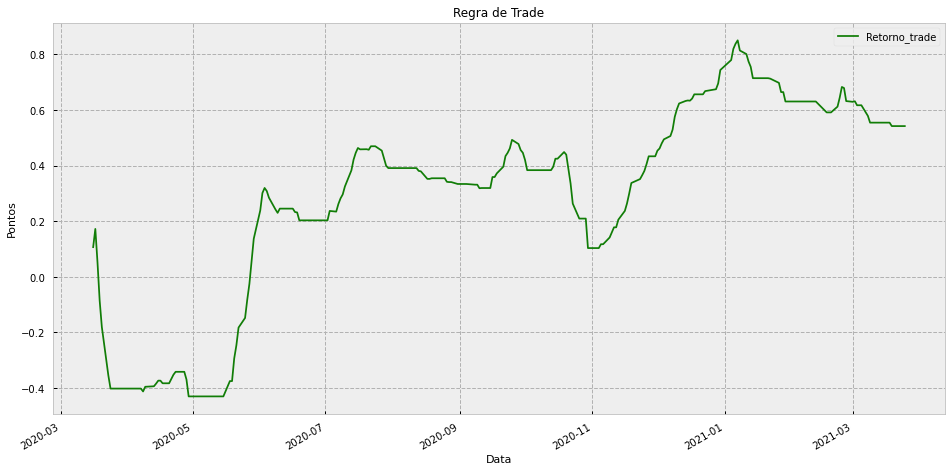

In [74]:
#Visualização

dados['Retorno_trade'].plot(figsize=(16, 8), color='#117d07');
plt.title('Regra de Trade');
plt.xlabel('Data');
plt.ylabel('Pontos');
plt.legend();

SCRIPT FINALIZADO!